# Семинар

## Постановка задачи.

Сначала вспомним постановку задачи. 
Как и в предыдущих задачах, мы хотим максимизировать логарифм функции правдоподобия $\ell(x | \theta)$, чтобы найти оценку вектора параметров $\theta$. 
Однако бывает так, что эта функция имеет такой вид, что максимизировать сложно (например, если под логарифмом оказывается сумма). 
Идея EM-алгоритма состоит в том, чтобы ввести латентные переменные $z$ и использовать совместное распределение $p(X, Z)$ для нахождения $\hat{\theta}$.

## EM-алгоритм в общем виде.

**Инициализация:** задать начальные условия на $\theta_{old}$.

**E.1-шаг:** найти условное распределение латентных переменных $p(Z | X, \theta_{old})$.

**E.2-шаг:** построить функцию $Q(\theta, \theta_{old}) = E_{Z | X, \theta}(\ell(x, z | \theta) | x, \theta_{old})$.

**M-шаг:** максимизировать $Q$ по $\theta$.

Далее повторять E- и M-шаги до сходимости.

## Обоснование EM-алгоритма.

Для обоснования ЕМ-алгоритма и понимания обозначений рассмотрим пример: 

Пусть $X_1, X_2, \ldots, X_n$ $\sim f(x, | \theta)$, где $f$ – какая-то функция плотности, $\theta$ – вектор неизвестных параметров этой плотности.

Пусть латентные переменные принимают всего два значения: $Z \in \{0, 1\}$ – с вероятностями $P(Z = 0) = p_1$, $P(Z = 1) = 1-p_1$.

Тогда $\ell(x | \theta) = \sum_i \ln f(x_i | \theta)$.

Заметим, что 

$$
\ell(x | \theta) = \sum_i \ln f(x_i | \theta) = \sum_i \sum_j P(Z = j)\ln f(x_i | \theta) = 
\sum_i \sum_j P(Z = j)\ln \dfrac{f(x_i, Z = j | \theta)}{P(Z = j | x_i, \theta)} = 
$$

(чтобы понять последний переход, распишите знаменатель выражения под логарифмом по формуле условной вероятности)

$$
= \sum_i \sum_j P(Z = j)\ln \dfrac{f(x_i, Z = j | \theta) P(Z = j)}{P(Z = j | x_i, \theta)P(Z = j)} = 
$$

$$
= \sum_i \sum_j P(Z = j) \ln \dfrac{f(x_i, Z = j | \theta)}{P(Z = j)} + \sum_i \sum_j P(Z = j) \ln \dfrac{P(Z = j)}{P(Z = j | x_i, \theta)} =
$$

$$
M(P(Z = j), \theta) + D_{KL}[P(Z = j) || P(Z = j | x_i, \theta)].
$$

Так как $D_{KL} \ge 0$, то $M(P(Z = j), \theta)$ является нижней оценкой на логарифм правдоподобия. Идея EM-алгоритма состоит в том, чтобы поочерёдно максимизировать $M(P(Z = j), \theta)$ по $P(Z = j)$ (на E-шаге) и по $\theta$ (на M-шаге).

**E-шаг.**

Максимизируем $M(P(Z = j), \theta)$ по $P(Z = j)$.

Так как $\ell(x | \theta)$ не зависит от $P(Z = j)$, то максимум $M(P(Z = j), \theta)$ по $P(Z = j)$ будет достигнут, когда $D_{KL}$ минимальна. 

Минимальная $D_{KL}(A || B)$ равна 0, и это достигается, когда $A || B$. Из этого делаем вывод, что на E-шаге мы устанавливаем

$$
P(Z = j) := P(Z = j | x_i, \theta^{old}).
$$

**M-шаг.**

Максимизируем $M(P(Z = j), \theta)$ по $\theta$. Распишем $M$ ещё раз:

$$
M = \sum_i \sum_j P(Z = j) \ln \dfrac{f(x_i, Z = j | \theta)}{P(Z = j)}
$$


Заметим, что знаменатель подлогарифмического выражения не зависит от $\theta$. Выбросим его и заменим $P(Z = j)$ на результат, полученный нами на E-шаге:

$$
M = \sum_i \sum_j P(Z = j | x_i, \theta^{old}) \ln f(x_i, Z = j | \theta) = \sum_i E_{Z | x_i, \theta_{old}}(\ln f(x_i, Z = j | \theta)) := Q(\theta | \theta^{old}).
$$

Далее мы максимизируем $Q$ по по $\theta$, обновляем $\theta$ на аргмаксимум $Q$, и возвращаемся к E-шагу.

## Обозначения.

Теперь соотнесём обозначения из общей постановки EM-алгоритма с теми, что мы получили в примере.

$p(Z)$ – это безусловное распределение $Z$. По сути, это массив размера $1\times k$, где $k$ – число значений $Z$.

$p(Z | X, \theta_{old})$ – это условное распределение $Z$ при условии выборки. По сути, это массив размера $N\times k$, где $N$ – размер выборки, $k$ – число значений $Z$. Каждая строчка есть вектор вероятностей того, что на данном наблюдении $Z$ равно соответствующему значению.

$E_{Z | X, \theta}(\cdot)$ – это сумма матожиданий $\sum_i E_{Z | x_i, \theta}$ по всем наблюдениям выборки.

$p(\cdot)$ – распределение того, что стоит в скобках. Эта функция может оказаться функцией вероятности или функцией плотности в зависимости от контекста.

## Пример с лекции: задача о кластеризации (разделение смеси нормальных распределений).


In [98]:
import numpy as np
import matplotlib.pyplot as plt

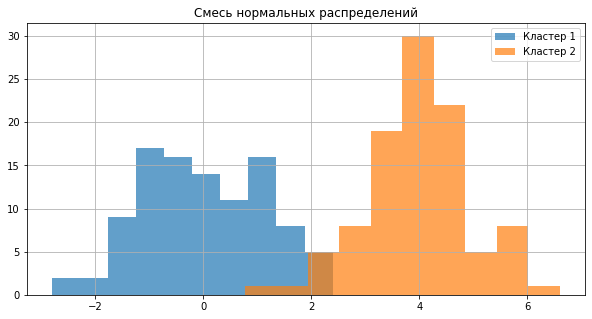

In [99]:
np.random.seed(123)
y1 = np.random.normal(0, 1, 100)
y2 = np.random.normal(4, 1, 100)
plt.figure(figsize = (10, 5))
_ = plt.hist(y1, alpha = 0.7, label = 'Кластер 1')
_ = plt.hist(y2, alpha = 0.7, label = 'Кластер 2')
_ = plt.legend()
_ = plt.title("Смесь нормальных распределений")
_ = plt.grid()

In [102]:
x = np.concatenate((y1, y2))
x.shape

(200,)

### Постановка задачи.

Пусть мы точно знаем, что наблюдения принадлежат одному из двух кластеров. Пусть в первом кластере наблюдения берутся из нормального $\mathcal{N}(\mu_1, \sigma_1^2)$ распределения, а во втором – из нормального $\mathcal{N}(\mu_2, \sigma_2^2)$ распределения. Предположим, что все наблюдения независимы, и вероятность того, что наблюдение относится к первому кластеру, равна $p_1$.

In [103]:
# Определите вектор параметров для данной задачи и задайте начальные условия
# theta = (mu_1, sigma2_1, mu2, sigma2_2, p_1)
# (воспользовались эвристикой)
theta = np.array([np.min(x), (np.max(x) - np.min(x)) / 2, np.max(x), (np.max(x) - np.min(x)) / 2, 1/2])
theta

array([-2.79858911,  4.69844652,  6.59830393,  4.69844652,  0.5       ])

### Определение латентных переменных.

$z \in \{1, 2\}$ – номер кластера.

Вспомним, что у нас есть обозначение $p_1 = P(z = 1)$ – вероятность отнести наблюдение к первому кластеру.

### E1-шаг.

Найти условное распределение латентных переменных $p(Z | X, \theta_{old})$. Для данной задачи это означает, что мы должны получить массив $200\times2$ (200 наблюдений, 2 значения $z$). Нам достаточно найти только один столбец массива – этот столбец будет размера $200\times1$ (то есть вероятность того, что $z = 1$) – потому что второй столбец определяется однозначно как ($1 - $ первый столбец).

По формуле условной вероятности:
$$
p(z | x, \theta_{old}) = \dfrac{p(z, x | \theta_{old})}{p(x | \theta_{old})}
$$

и
$$
p(x | z, \theta_{old}) = \dfrac{p(x, z | \theta_{old})}{p(z)}
$$

Тогда
$$
P(z_i = 1 | x_i, \theta_{old}) = \dfrac{p(z_i = 1, x_i | \theta_{old})}{f(x_i | \theta_{old})}
$$

$$
= \dfrac{f(x_i | z_i = 1, \theta_{old})p_1}{p_1f(x_i | z_i = 1, \theta_{old}) + (1-p_1)f(x_i | z_i = 2, \theta_{old})}
$$

In [104]:
# Задайте плотность x
def f(x, mu, sigma2):
    return 1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-1/2 * 1/sigma2 * (x - mu)**2)

In [105]:
# Рассчитайте распределение латентных переменных на наших данных
p_z_1 = f(x, mu = theta[0], sigma2 = theta[1]) * theta[4] / (theta[4] * f(x, mu = theta[0], sigma2 = theta[1]) + 
                                                       (1-theta[4]) * f(x, mu = theta[2], sigma2 = theta[3]))

In [107]:
# Заметим, что полученный массив имеет размер 200x1
p_z_1.shape

(200,)

### E2-шаг.

Постройте функцию $Q(\theta | \theta_{old}) = E_{Z | X, \theta}(\ell(x, z | \theta) | x, \theta_{old})$.

По формуле условной вероятности:
$$
p(x, z | \theta) = p(x | \theta, z) \times p(z)
$$

$$
Q(\theta | \theta_{old}) = \sum_i P(z_i = 1 | x, \theta_{old})[\ln f(x_i | \theta) + \ln p_1] + (1 - P(z_i = 1 | x, \theta_{old})[\ln f(x_i | \theta) + \ln(1-p_1)].
$$

### M-шаг.

Выведите формулы для максимизации $Q$.

$$
Q'_{\mu_1} = \sum_i P(z_i = 1 | x, \theta_{old}) \dfrac{(x_i - \mu_1)}{\sigma_1^2}
$$

$$
\mu_1^{new} = \dfrac{\sum_i P(z_i = 1 | x, \theta_{old}) x_i}{\sum_i P(z_i = 1 | x, \theta_{old})}
$$

Аналогично,

$$
\mu_2^{new} = \dfrac{\sum_i (1 - P(z_i = 1 | x, \theta_{old})) x_i}{\sum_i (1 - P(z_i = 1 | x, \theta_{old}))}
$$

Далее:

$$
Q'_{\sigma_1^2} = \sum_i P(z_i = 1 | x, \theta_{old}) (-\dfrac{1}{2\sigma^2_1} + \dfrac{1}{2}\dfrac{(x_i - \mu)^2}{\sigma_1^4})
$$

$$
\sigma_1^{2, new} = \dfrac{\sum_i (x_i - \mu)^2 P(z_i = 1 | x, \theta_{old})}{\sum_i P(z_i = 1 | x, \theta_{old})}
$$

Аналогично для $\sigma_2^{2, new}$.

Далее:

$$
Q'_{p_1} = \sum_i P(z_i = 1 | x, \theta_{old}) \dfrac{1}{p_1} - (1 - P(z_i = 1 | x, \theta_{old})) \dfrac{1}{1 - p_1}
$$

$$
p_1^{new} = \dfrac{\sum_i P(z_i = 1 | x, \theta_{old})}{n}
$$

In [108]:
# Реализуйте формулы для одного M-шага
mu_1 = np.sum(p_z_1 * x) / np.sum(p_z_1)

In [109]:
mu_2 = np.sum((1-p_z_1) * x) / np.sum(1-p_z_1)

In [110]:
sigma2_1 = np.sum((x - mu_1) ** 2 * p_z_1)/ np.sum(p_z_1)

In [111]:
sigma2_2 = np.sum((x - mu_2) ** 2 * (1 - p_z_1))/ np.sum(1 - p_z_1)

In [112]:
p1 = np.sum(p_z_1) / len(x)

In [113]:
theta_new = np.array([mu_1, sigma2_1, mu_2, sigma2_2, p1])

In [114]:
theta

array([-2.79858911,  4.69844652,  6.59830393,  4.69844652,  0.5       ])

In [115]:
theta_new

array([0.01920326, 1.45048155, 3.83743546, 1.30562653, 0.48023499])

### Решение задачи кластеризации.

На каждом шаге будем дополнительно рассчитывать значение $Q$. Для этого определим дополнительные функции:

In [349]:
# Логарифм функции плотности x
def lnf(x, mu, sigma2):
    return -1/2 * np.log(2 * np.pi * sigma2) - 1/2 * (x - mu) ** 2 / sigma2

In [350]:
def Q_f(x, theta, p_z_1):
    ell1 = lnf(x, theta[0], theta[1]) + np.log(theta[4])
    ell2 = lnf(x, theta[2], theta[3]) + np.log(1 - theta[4])
    return np.sum(p_z_1 * ell1 + (1 - p_z_1) * ell2)

Соберём E- и М-шаги в функцию.

In [351]:
def EM(x, theta):
    
    Q_history = []
    
    for i in range(100):
        
        # E-step
        p_z_1 = f(x, mu = theta[0], sigma2 = theta[1]) * theta[4] / (theta[4] * f(x, mu = theta[0], sigma2 = theta[1]) + 
                                                       (1-theta[4]) * f(x, mu = theta[2], sigma2 = theta[3]))
        
        # M-step
        mu_1 = np.sum(p_z_1 * x) / np.sum(p_z_1)
        mu_2 = np.sum((1-p_z_1) * x) / np.sum(1-p_z_1)
        sigma2_1 = np.sum((x - mu_1) ** 2 * p_z_1)/ np.sum(p_z_1)
        sigma2_2 = np.sum((x - mu_2) ** 2 * (1-p_z_1))/ np.sum(1 - p_z_1)
        p1 = np.sum(p_z_1) / len(x)
        theta_new = np.array([mu_1, sigma2_1, mu_2, sigma2_2, p1])
        
        theta = theta_new
        
        Q_history.append(Q_f(x, theta, p_z_1))
        
        if len(Q_history) > 1:
            if np.linalg.norm(Q_history[-1] - Q_history[-2]) < 1e-8:
                break
        
    return theta, Q_history

In [352]:
# Реинициализируем для удобства
np.random.seed(123)
y1 = np.random.normal(0, 1, 100)
y2 = np.random.normal(4, 1, 100)
x = np.concatenate((y1, y2))
theta = np.array([np.min(x), (np.max(x) - np.min(x)) / 2, np.max(x), (np.max(x) - np.min(x)) / 2, 1/2])

In [353]:
theta, Q = EM(x, theta)

In [354]:
# Вспомним, что theta = (mu1, sigma2_1, mu2, sigma2_2, p1)
theta

array([0.1335007 , 1.45409172, 4.09054136, 0.72902767, 0.52735233])

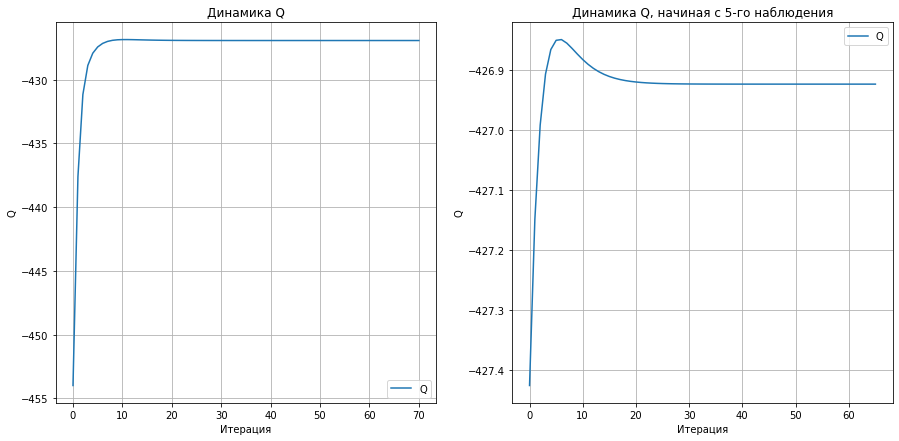

In [356]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].plot(Q, label = 'Q')
ax[0].legend()
ax[0].grid()
ax[0].set_xlabel("Итерация")
ax[0].set_ylabel("Q")
_ = ax[0].set_title("Динамика Q")
ax[1].plot(Q[5:], label = 'Q')
ax[1].legend()
ax[1].grid()
ax[1].set_xlabel("Итерация")
ax[1].set_ylabel("Q")
_ = ax[1].set_title("Динамика Q, начиная с 5-го наблюдения")

## Динамика Q.

Во многих источниках утверждается, что на каждой итерации EM-алгоритма значение **неполного правдоподобия** не уменьшается. Доказывается это следующим образом.

$$
\ell(x | \theta_{new}) = M(\theta_{new} | \theta_{old}) + D_{KL} \ge M(\theta_{new} | \theta_{old}) \ge M(\theta_{old} | \theta_{old}) = \ell(x | \theta_{old})
$$

Последнее равенство верно, потому что после E-шага значение неполного правдоподобия совпадает с его нижней оценкой. 

Заметим, однако, что мы можем сделать вывод только о **неполном правдоподобии**

$$
M(\theta_{new} | \theta_{old}) \ge M(\theta_{old} | \theta_{old}),
$$

но не об **ожидаемом неполном правдподобии**

$$
M(\theta_{old} | \theta_{old}) \text{ ? } M(\theta_{old} | \theta_{old-1}),
$$

то есть мы ничего не можем сказать о соотношениях нижней оценки на правдоподобие, если используются значения $P(Z = j)$ до и после E-шага. Можно заметить, что из этого следует, что мы также не можем сравнить

$$
M(\theta_{new} | \theta_{old}) \text{ ? } M(\theta_{old} | \theta_{old-1}).
$$

На практике это означает, что динамика $Q$ **может оказаться не монотонной**, что мы и увидели в примере выше (другими словами это описано [здесь](https://stats.stackexchange.com/questions/341173/em-algorithm-seems-to-work-but-q-is-not-monotonic-possible-reasons)). 

Заметим, что динамика изменения $Q$ до и после M-шага обязана быть монотонной в соответствии с доказательством выше.

In [357]:
def EM_dynamics(x, theta):
    
    Q_M = []
    
    for i in range(100):
        
        # E-step
        p_z_1 = f(x, mu = theta[0], sigma2 = theta[1]) * theta[4] / (theta[4] * f(x, mu = theta[0], sigma2 = theta[1]) + 
                                                       (1-theta[4]) * f(x, mu = theta[2], sigma2 = theta[3]))
        
        # Рассчитаем Q до M-шага
        Q_0 = Q_f(x, theta, p_z_1)
        
        # M-step
        mu_1 = np.sum(p_z_1 * x) / np.sum(p_z_1)
        mu_2 = np.sum((1-p_z_1) * x) / np.sum(1-p_z_1)
        sigma2_1 = np.sum((x - mu_1) ** 2 * p_z_1)/ np.sum(p_z_1)
        sigma2_2 = np.sum((x - mu_2) ** 2 * (1-p_z_1))/ np.sum(1 - p_z_1)
        p1 = np.sum(p_z_1) / len(x)
        theta_new = np.array([mu_1, sigma2_1, mu_2, sigma2_2, p1])
        
        theta = theta_new
        
        # Рассчитаем Q после M-шага и сохраним разницу
        Q_M.append(Q_f(x, theta, p_z_1) - Q_0)
        
    return theta, Q_M

In [358]:
# Реинициализируем для удобства
np.random.seed(123)
y1 = np.random.normal(0, 1, 100)
y2 = np.random.normal(4, 1, 100)
x = np.concatenate((y1, y2))
theta = np.array([np.min(x), (np.max(x) - np.min(x)) / 2, np.max(x), (np.max(x) - np.min(x)) / 2, 1/2])

In [359]:
theta, Q_M = EM_dynamics(x, theta)

In [360]:
# Вспомним, что theta = (mu1, sigma2_1, mu2, sigma2_2, p1)
theta

array([0.1335007 , 1.45409173, 4.09054136, 0.72902766, 0.52735233])

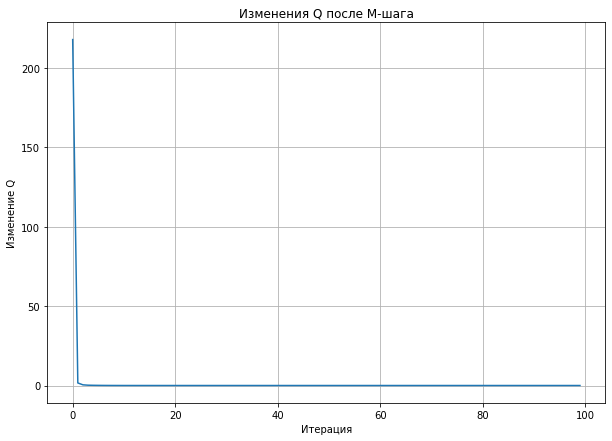

In [361]:
plt.figure(figsize = (10, 7))
plt.plot(Q_M)
plt.title("Изменения Q после M-шага")
plt.xlabel("Итерация")
plt.ylabel("Изменение Q")
plt.grid()

## Тестирование EM-алгоритма на случайных данных.

### Сильно разрозненные данные.

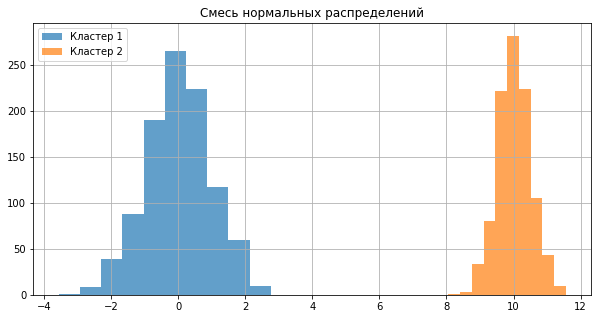

In [362]:
np.random.seed(1234)
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(10, 0.5, 1000)

x = np.hstack((x1, x2))
np.random.shuffle(x)

theta = np.array([np.min(x), (np.max(x) - np.min(x)) / 2, np.max(x), (np.max(x) - np.min(x)) / 2, 1/2])

plt.figure(figsize = (10, 5))
_ = plt.hist(x1, alpha = 0.7, label = 'Кластер 1')
_ = plt.hist(x2, alpha = 0.7, label = 'Кластер 2')
_ = plt.legend()
_ = plt.title("Смесь нормальных распределений")
_ = plt.grid()

In [363]:
theta, Q = EM(x, theta)

In [364]:
theta

array([ 0.01574058,  0.94685783, 10.02088093,  0.24555588,  0.5       ])

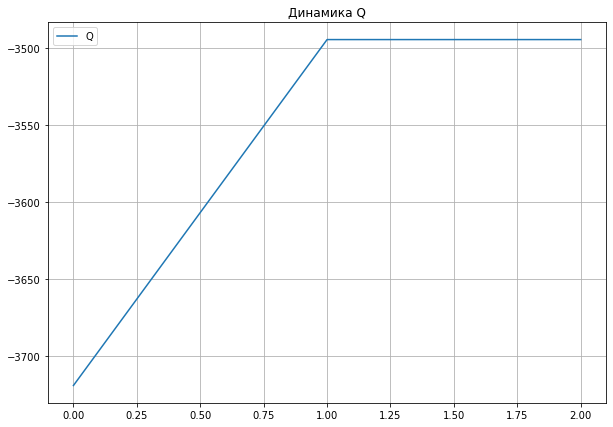

In [365]:
plt.figure(figsize = (10, 7))
_ = plt.plot(Q, label = 'Q')
_ = plt.legend()
_ = plt.grid()
_ = plt.title("Динамика Q")

### Сильно смешанные данные.

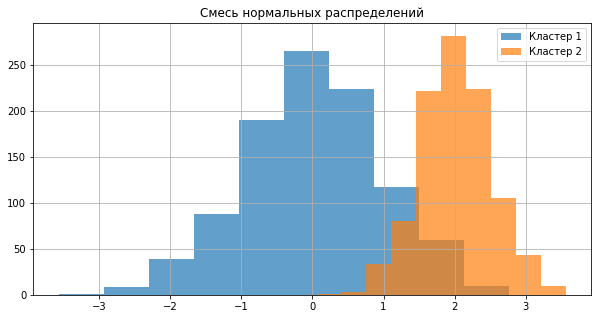

In [366]:
np.random.seed(1234)
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(2, 0.5, 1000)

x = np.hstack((x1, x2))
np.random.shuffle(x)

theta = np.array([np.min(x), (np.max(x) - np.min(x)) / 2, np.max(x), (np.max(x) - np.min(x)) / 2, 1/2])

plt.figure(figsize = (10, 5))
_ = plt.hist(x1, alpha = 0.7, label = 'Кластер 1')
_ = plt.hist(x2, alpha = 0.7, label = 'Кластер 2')
_ = plt.legend()
_ = plt.title("Смесь нормальных распределений")
_ = plt.grid()

In [367]:
theta, Q = EM(x, theta)

In [368]:
theta

array([-1.65246121e-03,  9.20790763e-01,  2.02135007e+00,  2.41473450e-01,
        4.95817131e-01])

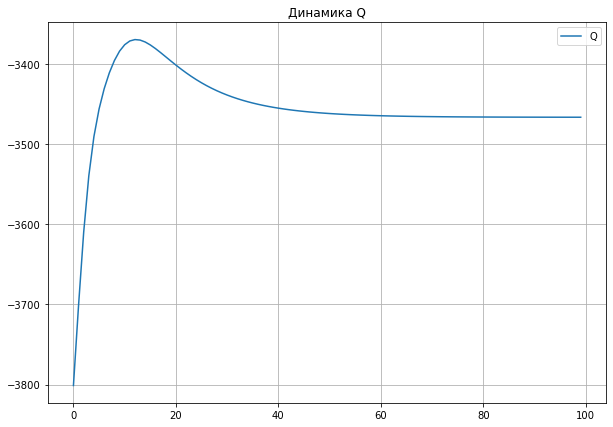

In [369]:
plt.figure(figsize = (10, 7))
_ = plt.plot(Q, label = 'Q')
_ = plt.legend()
_ = plt.grid()
_ = plt.title("Динамика Q")